## Demographic Change in Swedish Kommuner

---
Assumptions and Data Selection:-
- Working age: 18-67 years
- Time period 2024-2014


---


[![CC BY-NC-SA 4.0](https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0/)
<br>
This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-nc-sa/4.0/).



In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, SymLogNorm
from matplotlib.colors import TwoSlopeNorm
import matplotlib.patches as mpatches


Skipping field geo_point_2d: unsupported OGR type: 3


<function matplotlib.pyplot.show(close=None, block=None)>

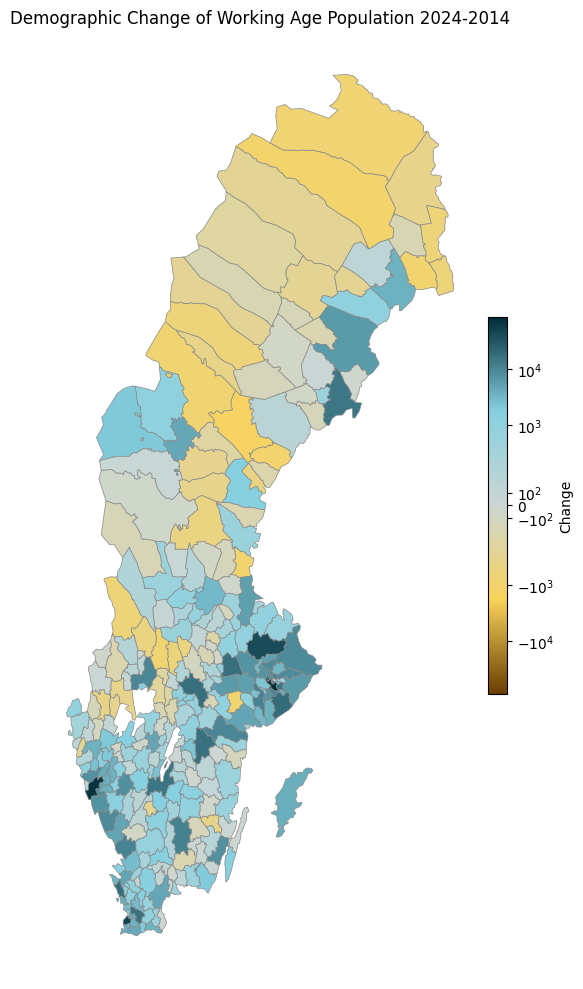

In [16]:

def build_colormap():
    #colour blind friendly
    colors = [
        (0.0,  "#6B3F02"),  # orangey brown (large loss)
        (0.25, "#F9D35A"),  # light yellow
        (0.5,  "#CCD6D3"),  # white at zero
        (0.75, "#86D0E0"),  # light blue
        (1.0,  "#002C39"),  # dark blue (large gain)
    ]
    return LinearSegmentedColormap.from_list("yellow_white_purple", colors, N=256)


df= pd.read_csv("./raw/change_clean.csv", encoding="utf-8")
gdf = gpd.read_file("swedish_municipalities.geojson")
merged = gdf.merge(df[["kommun", "Change"]], left_on="kom_namn", right_on="kommun", how="left")

   
    
# --- SymLogNorm: log-like scale with linear zone around 0  ---
vmin = np.nanmin(merged["Change"])
vmax = np.nanmax(merged["Change"])
bound = max(abs(vmin if vmin is not None else 0.0), abs(vmax if vmax is not None else 0.0)) or 1.0
linthresh = 500   
norm = SymLogNorm(linthresh=linthresh, linscale=1, vmin=-bound, vmax=bound)

cmap = build_colormap()

# Plot
fig, ax = plt.subplots(figsize=(8.5, 10))
merged.plot(column="Change", cmap=cmap, norm=norm, linewidth=0.5, edgecolor="#888888", ax=ax, missing_kwds={
        "color": "#f0f0f0", "hatch": "///", "label": "No data"
    })
ax.set_axis_off()

    

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Change")
plt.title("Demographic Change of Working Age Population 2024-2014")
# watermark-style credit

plt.tight_layout()
fig.savefig("./images/change_map.png", dpi=220)

plt.show

### Swedish Demographic Change


<function matplotlib.pyplot.show(close=None, block=None)>

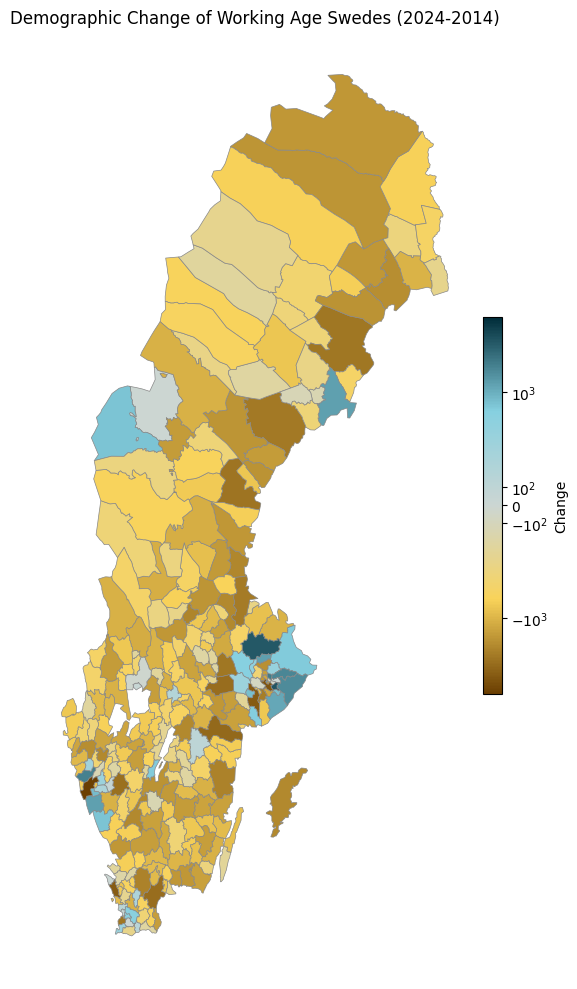

In [17]:
df = pd.read_csv("./raw/change_swedes_clean.csv", encoding="utf-8")

merged = gdf.merge(df[["kommun", "change"]], left_on="kom_namn", right_on="kommun", how="left")

# --- SymLogNorm: log-like scale with linear zone around 0  ---
vmin = np.nanmin(merged["change"])
vmax = np.nanmax(merged["change"])
bound = max(abs(vmin if vmin is not None else 0.0), abs(vmax if vmax is not None else 0.0)) or 1.0
linthresh = 500   
norm = SymLogNorm(linthresh=linthresh, linscale=1, vmin=-bound, vmax=bound)

cmap = build_colormap()

# Plot
fig, ax = plt.subplots(figsize=(8.5, 10))
merged.plot(column="change", cmap=cmap, norm=norm, linewidth=0.5, edgecolor="#888888", ax=ax, missing_kwds={
        "color": "#f0f0f0", "hatch": "///", "label": "No data"
    })
ax.set_axis_off()
    
plt.title("Demographic Change of Working Age Swedes (2024-2014)")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Change")

plt.tight_layout()
fig.savefig("./images/dk_change_map.png", dpi=220)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

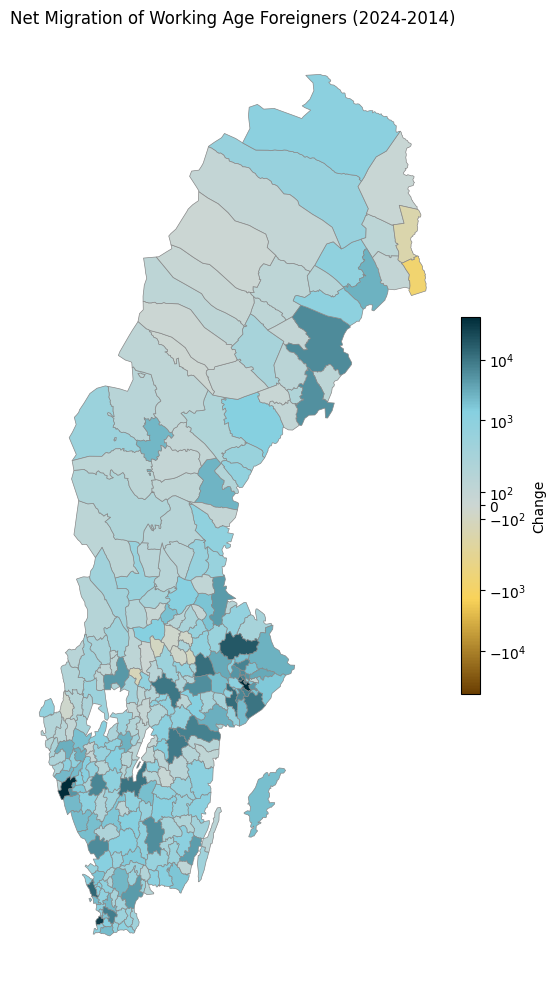

In [18]:
df = pd.read_csv("./raw/change_foreign_clean.csv", encoding="utf-8")

merged = gdf.merge(df[["kommun", "change"]], left_on="kom_namn", right_on="kommun", how="left")

# --- SymLogNorm: log-like scale with linear zone around 0  ---
vmin = np.nanmin(merged["change"])
vmax = np.nanmax(merged["change"])
bound = max(abs(vmin if vmin is not None else 0.0), abs(vmax if vmax is not None else 0.0)) or 1.0
linthresh = 500   
norm = SymLogNorm(linthresh=linthresh, linscale=1, vmin=-bound, vmax=bound)

cmap = build_colormap()

# Plot
fig, ax = plt.subplots(figsize=(8.5, 10))
merged.plot(column="change", cmap=cmap, norm=norm, linewidth=0.5, edgecolor="#888888", ax=ax, missing_kwds={
        "color": "#f0f0f0", "hatch": "///", "label": "No data"
    })
ax.set_axis_off()
    

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Change")
plt.title("Net Migration of Working Age Foreigners (2024-2014)")

plt.tight_layout()
fig.savefig("./images/foreign_change_map.png", dpi=220)

plt.show

In [19]:
df_national= pd.read_csv("./raw/change_clean.csv", encoding="utf-8")
df_Swedish = pd.read_csv("./raw/change_swedes_clean.csv", encoding="utf-8")
df_foreign = pd.read_csv("./raw/change_foreign_clean.csv", encoding="utf-8")

# Rename 'Change' columns before merging
df_national = df_national.rename(columns={"Change": "Total"})
df_Swedish = df_Swedish.rename(columns={"change": "Swedish"})
df_foreign = df_foreign.rename(columns={"change": "Foreign National"})

# Merge all on 'kommun'
df_all = (
    df_national[["kommun", "Total"]]
    .merge(df_Swedish[["kommun", "Swedish"]], on="kommun", how="left")
    .merge(df_foreign[["kommun", "Foreign National"]], on="kommun", how="left")
)



### Data Exploration

Classifying municipal growth patterns into different categorical groupings

In [20]:
SMALL = 100  # treat anything between -SMALL and +SMALL as ~stable/rounding noise
eps = 1e-9

# clean types just in case
df_all["kommun"] = df_all["kommun"].astype(str).str.strip()
for c in ["Total","Swedish","Foreign National"]:
    df_all[c] = pd.to_numeric(df_all[c], errors="coerce").fillna(0)

# helper metrics
df_all["replacement_ratio"] = np.where(
    df_all["Swedish"] < -SMALL,
    df_all["Foreign National"] / (-df_all["Swedish"] + eps),
    np.nan
)
df_all["foreign_share_of_growth"] = np.where(
    df_all["Total"] > SMALL,
    df_all["Foreign National"] / (df_all["Total"] + eps),
    np.nan
)

def classify(row):
    T = row["Total"]
    D = row["Swedish"]
    F = row["Foreign National"]

    # near-zero helpers
    T_pos  = T >  SMALL
    T_neg  = T < -SMALL
    T_flat = not T_pos and not T_neg

    D_pos, D_neg = D > SMALL, D < -SMALL
    F_pos, F_neg = F > SMALL, F < -SMALL

    # priority order of mutually exclusive categories
    if T_pos and D_neg and F_pos:
        # growth but Swedes down -> foreigners are the driver
        return "Growth driven by people with foreign backgrounds"
    if T_flat and D_neg and F_pos:
        # total ~flat but foreigners offset Swedish decline
        return "Stable because of people with foreign backgrounds"
    if T_pos and D_pos and F_pos:
        return "Dual growth (Swedes + Foreigners)"
    if T_pos and D_pos and not F_pos:
        return "Growth driven by Swedes"
    if T_neg and D_neg and not F_pos:
        return "Working age population decline"
    if T_neg and D_neg and F_pos:
        return "Decline despite foreign inflow"
    if T_flat and ((D_pos and F_neg) or (D_neg and F_pos)):
        return "Stable: offsetting churn"
    return "Small change"




df_all["Typology"] = df_all.apply(classify, axis=1)



In [21]:
df_all[df_all["Typology"] == "Growth driven by people with foreign backgrounds"].sort_values("Foreign National", ascending=False).head(10)

df_all["Foreign_share_of_total_growth"] = (
    df_all["Foreign National"] / (df_all["Total"].replace(0, np.nan))
)


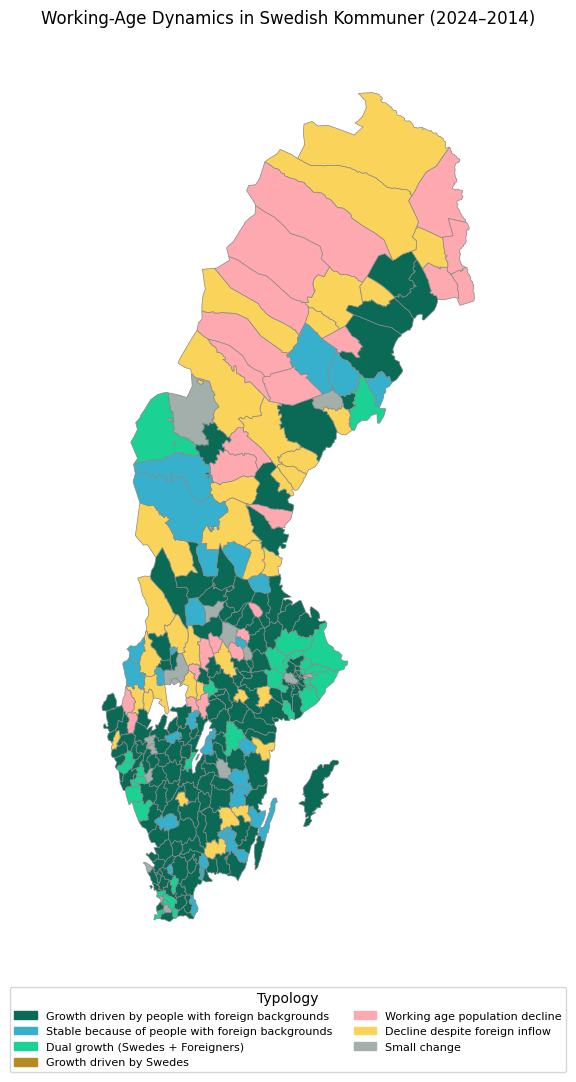

In [22]:
# Clean merge keys
df_plot = df_all.copy()
df_plot["kommun"] = df_plot["kommun"].astype(str).str.strip()
gdf["kom_namn"] = gdf["kom_namn"].astype(str).str.strip()

merged = gdf.merge(df_plot, left_on="kom_namn", right_on="kommun", how="left")

# Color-blind friendly palette
PALETTE = {
    "Growth driven by people with foreign backgrounds":        "#0B6A55",  # blue
    "Stable because of people with foreign backgrounds":   "#36B0CC",  # light blue
    "Dual growth (Swedes + Foreigners)":   "#1CD194",  # green
    "Growth driven by Swedes":             "#B58A21",  # orange
    "Working age population decline":     "#FDA9AF",  # light pink
    "Decline despite foreign inflow":     "#F9D35A",  # yellow
    "Small change":                "#A3AFAB",  # grey
}

merged["cat_color"] = merged["Typology"].map(PALETTE).fillna("#f0f0f0")

fig, ax = plt.subplots(figsize=(10, 12))  # Made taller and wider
merged.plot(color=merged["cat_color"], linewidth=0.5, edgecolor="#888888", ax=ax)
ax.set_axis_off()
plt.title("Working-Age Dynamics in Swedish Kommuner (2024–2014)", pad=20)

# Build legend in fixed, readable order
legend_order = [
    "Growth driven by people with foreign backgrounds",
    "Stable because of people with foreign backgrounds",
    "Dual growth (Swedes + Foreigners)",
    "Growth driven by Swedes",
    "Working age population decline",
    "Decline despite foreign inflow",
    "Small change"
]
patches = [mpatches.Patch(color=PALETTE[k], label=k) for k in legend_order]
leg = ax.legend(handles=patches, title="Typology", 
                loc="upper center", bbox_to_anchor=(0.5, -0.02),
                ncol=2, frameon=True, fontsize=8)
for t in leg.get_texts():
    t.set_fontsize(8)

plt.subplots_adjust(bottom=0.12)  # Make room at bottom for legend
fig.savefig("./images/typology_map.png", dpi=220, bbox_inches='tight')
plt.show()


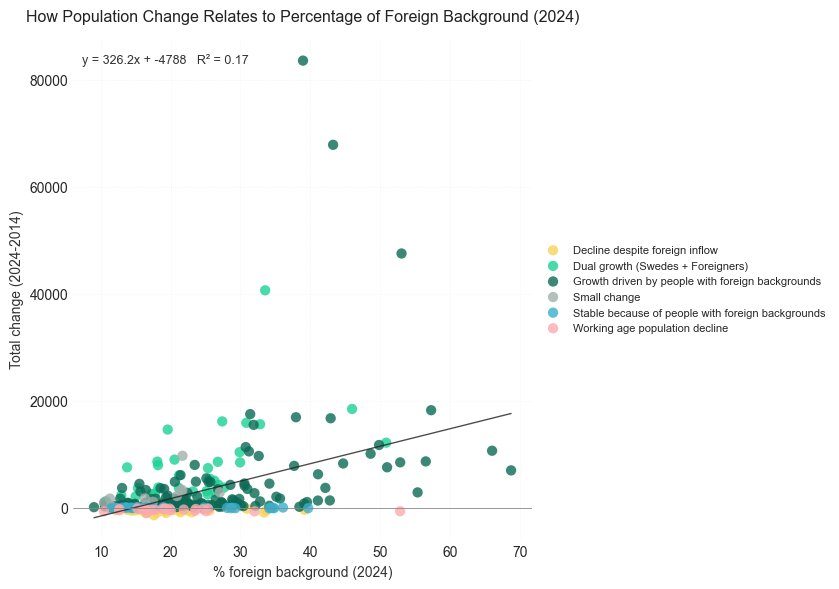

In [23]:
# === SETTINGS ===
INPUT_CSV = "./raw/foreigner_percent_clean.csv"
Y_VAR = "Total"  # "Total", "Swedish", or "Foreign National"
OUTPUT_PNG = f"./images/scatter_{Y_VAR.lower()}_vs_foreign_share_typology_minimal.png"
TITLE = f"How Population Change Relates to Percentage of Foreign Background (2024)"

# Color-blind friendly palette 
TYPOLOGY_COLOURS = {
    "Growth driven by people with foreign backgrounds":        "#0B6A55",  # blue
    "Stable because of people with foreign backgrounds":   "#36B0CC",  # light blue
    "Dual growth (Swedes + Foreigners)":   "#1CD194",  # green
    "Growth driven by Swedes":             "#B58A21",  # orange
    "Working age population decline":     "#FDA9AF",  # light pink
    "Decline despite foreign inflow":     "#F9D35A",  # yellow
    "Small change":                "#A3AFAB",  # grey
}

# === 1) Load % foreign CSV ===
foreign = pd.read_csv(INPUT_CSV, encoding="utf-8")
foreign = foreign.rename(columns={"percent": "pct_foreign_2024"})

# === 2) Merge with df_all ===
merged = df_all.merge(foreign[["kommun", "pct_foreign_2024"]], on="kommun", how="left")

for c in ["Total", "Swedish", "Foreign National"]:
    merged[c] = pd.to_numeric(merged[c], errors="coerce")

# === 3) Plot ===
plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize=(8.5, 6))

# Scatter by typology
for typ, group in merged.groupby("Typology"):
    ax.scatter(
        group["pct_foreign_2024"],
        group[Y_VAR],
        s=55,
        color=TYPOLOGY_COLOURS.get(typ, "#999999"),
        label=typ,
        alpha=0.8,
        edgecolor="none",
    )

# Trend line
x = merged["pct_foreign_2024"]
y = merged[Y_VAR]
mask = x.notna() & y.notna()
coef = np.polyfit(x[mask], y[mask], 1)
poly = np.poly1d(coef)
x_line = np.linspace(x.min(), x.max(), 200)
ax.plot(x_line, poly(x_line), linestyle="-", color="#222222", lw=1.0, alpha=0.8)

# Equation + R² (discreet, top left)
r2 = 1 - np.sum((y[mask] - poly(x[mask]))**2) / np.sum((y[mask] - y[mask].mean())**2)
ax.text(
    0.02, 0.97, f"y = {coef[0]:.1f}x + {coef[1]:.0f}   R² = {r2:.2f}",
    transform=ax.transAxes, ha="left", va="top", fontsize=9, color="#333333"
)

# Minimalist axes
ax.axhline(0, color="#888888", lw=0.6)
ax.set_xlabel("% foreign background (2024)", fontsize=10, color="#333333")
ax.set_ylabel(f"{Y_VAR} change (2024-2014)", fontsize=10, color="#333333")
ax.set_title(TITLE, fontsize=11.5, color="#222222", pad=12)
ax.grid(True, linestyle=":", lw=0.5, alpha=0.3)

# Legend — small and off to the side
ax.legend(
     fontsize=8,
    loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False
)

# Clean up borders
for spine in ax.spines.values():
    spine.set_visible(False)

fig.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=220, bbox_inches="tight")
plt.show()


In [25]:
# === Kommuner where growth is driven by foreigners ===
growth_foreign = (
      merged.loc[merged["Typology"] == "Growth driven by people with foreign backgrounds",
                 ["kommun", "Total", "Swedish",
  "Foreign National", "pct_foreign_2024"]]
      .sort_values("pct_foreign_2024",
  ascending=False)
      .reset_index(drop=True)
  )

# Display
growth_foreign.head(90)


,kommun,Total,Swedish,Foreign National,pct_foreign_2024
0,Botkyrka,7004,-2712,6833,68.76
1,Södertälje,10676,-5161,12033,66.04
2,Järfälla,18249,-1712,14788,57.31
3,Sigtuna,8682,-1980,7253,56.54
4,Burlöv,2890,-523,2210,55.37
...,...,...,...,...,...
85,Eksjö,1194,-862,823,21.76
86,Sala,918,-1262,846,21.67
87,Älvkarleby,383,-347,211,21.44
88,Skellefteå,6126,-3120,6104,21.42


In [26]:
# === Kommuner where growth is held steady by foreigners ===
steady_foreign = (
      merged.loc[merged["Typology"] == "Stable because of people with foreign backgrounds",
                 ["kommun", "Total", "Swedish",
  "Foreign National", "pct_foreign_2024"]]
      .sort_values("pct_foreign_2024",
  ascending=False)
      .reset_index(drop=True)
  )


steady_foreign.head(90)

,kommun,Total,Swedish,Foreign National,pct_foreign_2024
0,Fagersta,-61,-696,333,39.70
1,Perstorp,61,-533,335,36.09
2,Eda,-41,-477,199,34.82
3,Olofström,-31,-527,249,34.63
4,Lessebo,33,-656,366,34.38
5,Hylte,-82,-631,304,34.12
6,Hultsfred,-65,-1401,640,29.26
7,Årjäng,21,-465,256,28.79
8,Emmaboda,-3,-799,509,28.09
9,Skara,-40,-1433,890,25.29


In [27]:
# === Kommuner where growth is through foreigners and Swedes ===
growth_both = (
      merged.loc[merged["Typology"] == "Dual growth (Swedes + Foreigners)",
                 ["kommun", "Total", "Swedish",
  "Foreign National", "pct_foreign_2024"]]
      .sort_values("pct_foreign_2024",
  ascending=False)
      .reset_index(drop=True)
  )

# Display
growth_both.head(90)


,kommun,Total,Swedish,Foreign National,pct_foreign_2024
0,Sundbyberg,12184,1116,7183,50.87
1,Haninge,18488,1157,10508,45.99
2,Uppsala,40654,4257,19390,33.54
3,Lund,15622,504,8311,32.81
4,Nacka,15895,4486,4817,30.84
5,Mölndal,8493,804,5037,29.95
6,Täby,10410,2381,4878,29.88
7,Tyresö,3789,735,1848,27.66
8,Linköping,16154,110,9316,27.39
9,Staffanstorp,4309,496,1851,26.85


In [28]:
# === Foreigners arriving but kommune workforce still contracting ===
contracting_foreign = (
      merged.loc[merged["Typology"] == "Decline despite foreign inflow",
                 ["kommun", "Total", "Swedish",
  "Foreign National", "pct_foreign_2024"]]
      .sort_values("pct_foreign_2024",
  ascending=False)
      .reset_index(drop=True)
  )

# Display
contracting_foreign.head(90)

,kommun,Total,Swedish,Foreign National,pct_foreign_2024
0,Gnosjö,-378,-713,190,39.20
1,Högsby,-461,-773,282,33.72
2,Flen,-880,-1512,383,33.39
3,Uppvidinge,-161,-711,381,30.92
4,Bengtsfors,-480,-929,239,25.56
5,Tingsryd,-232,-992,550,24.72
6,Filipstad,-837,-1044,149,23.05
7,Överkalix,-208,-380,164,22.61
8,Lindesberg,-128,-1385,480,22.52
9,Hagfors,-503,-1182,454,22.45


In [29]:
# Typology List of Kommuner
  
typology_pct = (
      merged.loc[
          (merged["Typology"] != "Dual growth (Swedes + Foreigners)") &
          (merged["pct_foreign_2024"] >= 10),
          ["kommun", "Typology",
  "pct_foreign_2024"]
      ]
      .sort_values("pct_foreign_2024",
  ascending=False)
      .reset_index(drop=True)
  )

typology_pct.head(90)



,kommun,Typology,pct_foreign_2024
0,Botkyrka,Growth driven by people with foreign backgrounds,68.76
1,Södertälje,Growth driven by people with foreign backgrounds,66.04
2,Järfälla,Growth driven by people with foreign backgrounds,57.31
3,Sigtuna,Growth driven by people with foreign backgrounds,56.54
4,Burlöv,Growth driven by people with foreign backgrounds,55.37
...,...,...,...
85,Bromölla,Stable because of people with foreign backgrounds,24.78
86,Tingsryd,Decline despite foreign inflow,24.72
87,Laxå,Working age population decline,24.65
88,Mellerud,Growth driven by people with foreign backgrounds,24.55


### Summary
I don't think it makes sense to classify people who were born in Sweden as 'foreign', when they're more than half of a town's population. I think the definition of Swedish has probably expanded.